<a href="https://colab.research.google.com/github/digambars-git-hub/Basic-temperature-predictor/blob/main/Temperature_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
np.random.seed(42)
temperatures = np.random.uniform(0,50,100).reshape(-1, 1)

In [ ]:
threshold = 30  # Threshold for high temp
labels = (temperatures>=threshold).astype(int).ravel()
# (temperatures>=threshold) : gives True or False
# .astype(int) : converts boolean to int
# .ravel() : [[0],[1],[0]] to [0,1,0] i.e., 2d array to 3d

print(f"Generated {len(temperatures)} data points.")
print(f"Number of Low : {np.sum(labels == 0)}")
print(f"Number of high : {np.sum(labels == 1)}")

Generated 100 data points.
Number of Low : 63
Number of high : 37


### Splitting the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(temperatures, labels, test_size=0.3, random_state=43)

### Visualizing the data

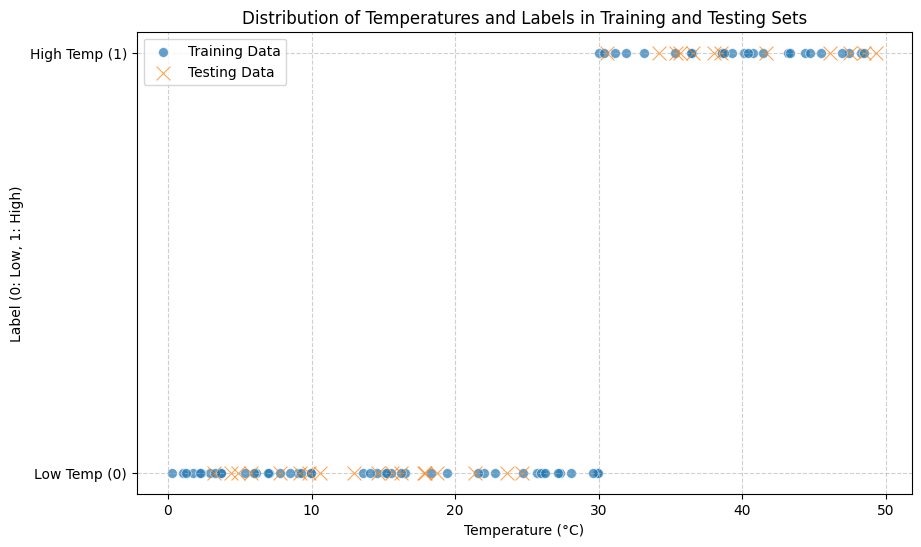

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting graph
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train.flatten(), y=y_train, label='Training Data', marker='o', s=50, alpha=0.7)
sns.scatterplot(x=X_test.flatten(), y=y_test, label='Testing Data', marker='x', s=100, alpha=0.7)

plt.xlabel('Temperature (°C)')
plt.ylabel('Label (0: Low, 1: High)')
plt.title('Distribution of Temperatures and Labels in Training and Testing Sets')
plt.yticks([0, 1], ['Low Temp (0)', 'High Temp (1)'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

In [ ]:
model = LogisticRegression()
# Initializing the model

model.fit(X_train, y_train)
LogisticRegression()

y_pred = model.predict(X_test)
# Evaluating the model

print("model evaluation")
print(f"Accuracy : {accuracy_score(y_test, y_pred): .2f}\n")
print("Classification report")
print(classification_report(y_test, y_pred, target_names=['Low', 'High']))

model evaluation
Accuracy :  1.00

Classification report
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00        18
        High       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Drawing confusion matrix

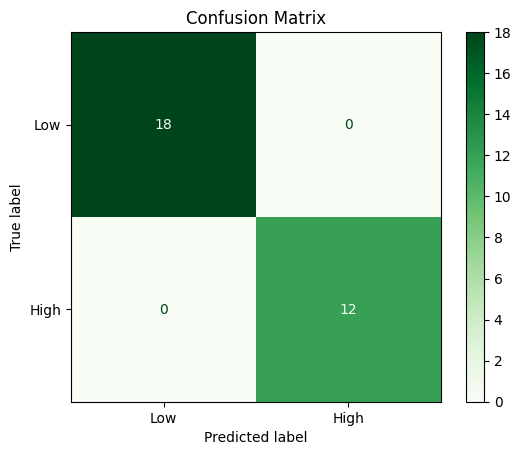

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low', 'High'])
disp.plot(cmap=plt.cm.Greens)
plt.title('Confusion Matrix')
plt.show()

## Using the model

In [ ]:
def classify_temperature(temp_list):
  new_data = np.array(temp_list).reshape(-1, 1)
  # Reshaping the input for the model
  print(f"New data array : {new_data}")

  predictions = model.predict(new_data)
  # Predicts the class 0 or 1

  probabilities = model.predict_proba(new_data)
  # Predicts probability of being high

  print(f"\n-- Classifying Temperatures : {temp_list} --")
  for temp, pred, *rest, prob in zip(temp_list, predictions, predictions, probabilities):
    status = "high" if pred == 1 else "low"
    print(f"{temp} classified as : {status} (High probability : {prob[1]:.4f})")

In [ ]:
classify_temperature([5,24,25,40,15.5,35])

New data array : [[ 5. ]
 [24. ]
 [25. ]
 [40. ]
 [15.5]
 [35. ]]

-- Classifying Temperatures : [5, 24, 25, 40, 15.5, 35] --
5 classified as : low (High probability : 0.0000)
24 classified as : low (High probability : 0.0004)
25 classified as : low (High probability : 0.0014)
40 classified as : high (High probability : 1.0000)
15.5 classified as : low (High probability : 0.0000)
35 classified as : high (High probability : 0.9978)
